# Basic Simulations

## State

### Global State

| Name | Description | Type | Symbol | Domain | Initial Value |
| --- | --- | --- | --- | --- | --- |
|Dummy|The dummy entity|Entity Type||| None |
|Qi Supply|The total supply of Qi|Qi Type||| None |
|Quai Supply|The total supply of Quai|Quai Type||| None |
|Locked Qi Supply|The total supply of Qi that is locked|Qi Type||| None |
|Locked Quai Supply|The total supply of Quai that is locked|Quai Type||| None |
|Block Number|The current block that the system is on|Block Number Type||| 0 |
|Block Difficulty|The latest difficulty for blocks|Block Difficulty Type||| 1000000000 |
|Historical Converted Qi|An array of the conversions from Qi to Quai. The Qi Values will be negative in each entry and Quai values will be positive. Time is also logged in the entries of the array.|Conversions Array Type||| [] |
|Historical Converted Quai|An array of the conversions from Quai to Qi. The Quai Values will be negative in each entry and Qi values will be positive. Time is also logged in the entries of the array.|Conversions Array Type||| [] |
|Historical Mined Ratio|An array of the historical ratios of mining between Qi and Quai which the miners had chosen at given times. 0 corresponds to 100% Qi, 1 corresponds to 100% Quai, number in between are the increments between those balances.|Mined Ratio Array Type||| [] |
|Historical Qi Hash|An array of the historical amount of hash attributed to Qi in block rewards with block numbers attatched to each entry.|Hash Array Type||| [] |
|Historical Quai Hash|An array of the historical amount of hash attributed to Quai in block rewards with block numbers attatched to each entry.|Hash Array Type||| [] |
|K Qi|The controller coeffecient for Qi.|Gain Type||| 2.98e-08 |
|K Quai|The controller coeffecient for Quai.|Gain Type||| 1 |
|Quai Price|The current price of Quai.|USD Type||| 1 |
|Qi Price|The current price of Qi.|USD Type||| 1 |
|Simulation History Log|The logged data from simulation history.|Simulation History Log Type||| [] |
|Number of Regions|The current number of regions.|Number of Regions Type||| 2 |
|Zones per Region|The current number of zones in each region.|Zones per Region Type||| 2 |
|Time|The current time in the system.|Datetime Type||| 0 |
|Delta Time|The amount of time covered in the current simulation epoch.|Delta Time Type||| 0 |
|Quai Unlock Schedule|The schedule of Quai token unlocks that will happen in the future|Unlock Schedule Type||| None |
|Qi Unlock Schedule|The schedule of Qi token unlocks that will happen in the future|Unlock Schedule Type||| None |
|Population Mining Beta Vector|The population betas, not known to the controller|Mining Beta Vector Type||| [-0.0001  0.0001] |
|Estimated Mining Beta Vector|The controllers current estimation of the beta vector|Mining Beta Vector Type||| [None, None] |
|Logistic Classifier|The logistic classifier used for beta estimation|Logistic Classifier Type||| None |
|Mining Log|The log of mined blocks|Simulation History Log Type||| None |

## Parameters

| Name | Description | Parameter Class | Symbol | Domain | Initial Value |
| --- | --- | --- | --- | --- | --- |
|Minimum Quai Conversion Amount|The minimum amount of Quai that can be converted|System||| 0 |
|Minimum Qi Conversion Amount|The minimum amount of Qi that can be converted|System||| 0 |
|Asset Return Parameterization|The parameters for determining random assets returns with correlations|Behavioral||| None |
|Price EWMA Lambda|The exponential decay rate for price signals|Behavioral||| 0.05 |
|Hashpower Cost Series|The cost of hashpower by block number|Behavioral||| [0.1, 0.2, ... , 1000.0, 1000.1] |
|Qi Price Movemement Sigma|The standard deviation of qi price movements|Behavioral||| 0.01 |
|Quai Price Movemement Sigma|The standard deviation of quai price movements|Behavioral||| 0.01 |
|Speculator Percentage|The percentage of the supply that is speculative|Behavioral||| 0.1 |
|Conversion Percentage Mu|The avergage percentage for conversions of tradeable capital|Behavioral||| 0.01 |
|Conversion Percentage Sigma|The standard deviation for conversions of tradeable capital|Behavioral||| 0.001 |
|Maximum Conversion Rate|The maximum conversion rate allowed|System||| 10 |
|PID Parameterization|The PID parameters|System||| None |
|Initial Block Difficulty|The starting block difficulty|System||| None |
|Controller Alpha Parameter|The alpha parameter for tuning the adjustment speed|System||| 1 |
|State Update Skipping Parameter|A list of state updates to turn off for debugging and testing purposes|Functional||| [] |
|Population Beta Signal|A list of population beta vectors to use in simulation|Behavioral||| [[-2.e+00  1.e-03], [-2.e+00  1.e-03], ... , [-2.e+00  1.e-03], [-2.e+00  1.e-03]] |
|Minimum K Qi|The minimum value allowed for K Qi|System||| 0 |
|Minimum K Quai|The minimum value allowed for K Quai|System||| 0 |
|Block Difficulty Multiples|The difficulty of different levels of blocks as multipliers on global difficulty|System||| None |
|Target Mining Time|The target time for mining to take|System||| 5 |
|Quai Reward Base Parameter|The base used for Quai reward computation|System|B|| 2 |
|Aggregate Hashpower Series|A series of the aggregate hashpower to be used at each block number|Behavioral||| [250000000.0, 250000000.0, ... , 250000000.0, 250000000.0] |
|Difficulty Adjustment Period|The number of blocks over which difficulty is adjusted|System||| 43.75 |
|Difficulty Randomness Sigma|The mean value for randomness percentage multiplied into block difficulties (1 being default/average equal to block difficulty)|System||| 0.2 |
|Difficulty Randomness Mu|The standard deviation of the percentage multiplied into block difficulties|System||| 1 |
|Initial Vesting Schedule|The vesting schedule for initial allocations|System||| [{'vesting_amount': 500000000.0, 'vesting_frequency': 'Immediate', 'time': 0, 'recipient': 'Foundation', 'duration': None}, {'vesting_amount': 1166666666.6666667, 'vesting_frequency': 'Monthly', 'time': 0, 'recipient': 'Foundation', 'duration': 6}, ... , {'vesting_amount': 16666666.666666668, 'vesting_frequency': 'Immediate', 'time': 0, 'recipient': 'Earn Program', 'duration': None}, {'vesting_amount': 50000000.0, 'vesting_frequency': 'Monthly', 'time': 0, 'recipient': 'Earn Program', 'duration': 2}] |
|Lockup Options|The options for locking up for different time frames|System||| {1: {0.038461538461538464: 1, 0.25: 1.035, 0.5: 1.1, 1: 1.25}, 2: {0.038461538461538464: 1, 0.25: 1.0175, 0.5: 1.05, 1: 1.15}, 3: {0.038461538461538464: 1, 0.25: 1.00875, 0.5: 1.025, 1: 1.0625}, 4: {0.038461538461538464: 1, 0.25: 1.004375, 0.5: 1.0125, 1: 1.03125}, 5: {0.038461538461538464: 1, 0.25: 1.002188, 0.5: 1.00625, 1: 1.015625}} |

In [1]:
import os

# For dev
"""os.chdir("../..")
from MSML.src.math_spec_mapping import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz, write_basic_report_full,
                      write_action_chain_reports, write_spec_tree, create_parameter_impact_table,
                     write_entity_reports, write_wiring_report, write_entity_markdown_report,
                     write_all_markdown_reports)
os.chdir("Quai-Macro-Model/Spec")"""
from math_spec_mapping import (load_from_json)

from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
import numpy as np
from pprint import pprint
from simulation import (state_base, params_base, vesting_schedule_translate,
                        build_logistic_classifier, post_processing_function,
                        plot_beta_errors, plot_betas, plot_boxplot_betas, difficulty_metrics,
                        reward_metrics, controller_metrics, mined_ratio_metrics,
                        plot_beta_error_norm, plot_mined_block_percent,
                        plot_block_difficulty, beta_convergance, plot_kqi_ratio,
                        beta_convergance2, difficulty_mining_scatter)
import numpy as np

ms = load_from_json(deepcopy(math_spec_json))


## Global Inputs

In [2]:
# Number of prime blocks
T = 2000

# Blocks to run
blocks = ["Log Simulation Data Mechanism"] + ["Price Movements Wiring",
            "Conversions Wiring",
            "Mine Block Wiring",
            "Unlock Tokens Wiring",
            "Update Population Beta Wiring",
            "Log Simulation Data Mechanism",] * T

# Block by block hashpower
# aggregate_hashpower_series = [25 for _ in range(1, 10002)]
aggregate_hashpower_series = [2.5e8 for _ in range(1, 10002)]
# aggregate_hashpower_series = np.random.normal(2.5e8, 1e7, 10001)

def display_results(df, metrics):
    print("Metrics:")
    print(metrics)
    print()
    print("Data:")
    print(df)
    print()
    print("Visualizations:")
    print()
    plot_beta_errors(df)
    plot_beta_error_norm(df)
    plot_betas(df)
    plot_boxplot_betas(df)
    plot_mined_block_percent(df)
    plot_block_difficulty(df)
    plot_kqi_ratio(df)
    difficulty_mining_scatter(df)

## Sanity Check 0: Constant Difficulty, K Qi, K Quai, Population Beta Values

A simulation with the above state updates turned off to test basic simulation running.

Placeholder has no control action options
Metrics:
Difficulty Mu                        1.000000e+09
Difficulty Sigma                     0.000000e+00
Block Reward Ratio Mu                1.003267e+00
Block Reward Ratio Sigma             0.000000e+00
Conversion Rate Mu                   4.841259e-02
Conversion Rate Sigma                6.940628e-18
K Qi / K Quai Mu                     2.980000e-08
K Qi / K Quai Sigma                  6.619099e-24
Mined Ratio (Block Percent) Mu       4.975938e-01
Mined Ratio (Block Percent) Sigma    1.240115e-01
dtype: float64

Data:
      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0                NaN             NaN           -0.3344      1.000000e-08   
1           1.268034   -3.990997e-08           -0.3344      1.000000e-08   
2           0.598040   -1.899157e-08           -0.3344      1.000000e-08   
3           0.189071   -5.806266e-09           -0.3344      1.000000e-08   
4           0.202605   -6.281601e-09           

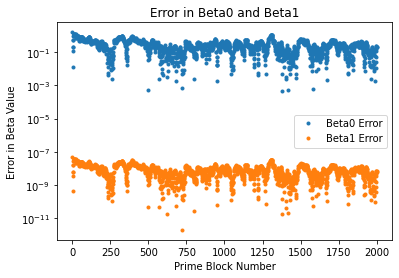

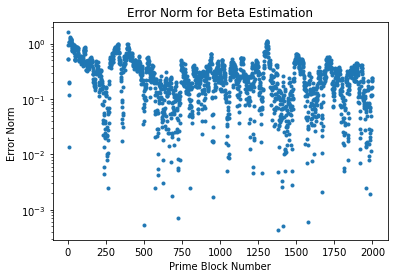

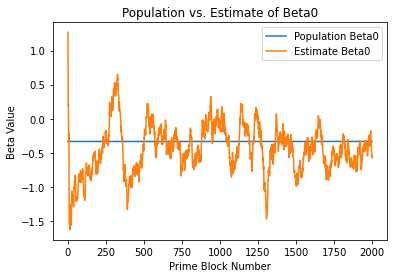

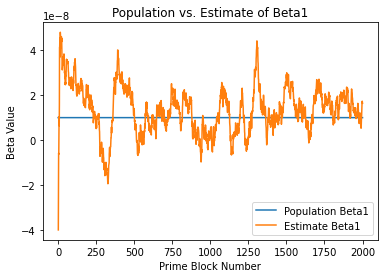

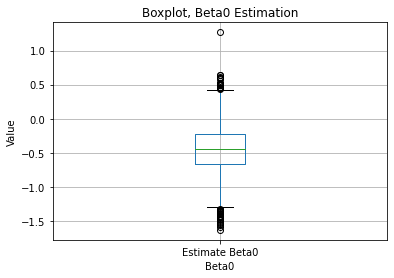

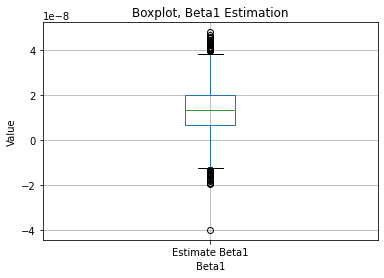

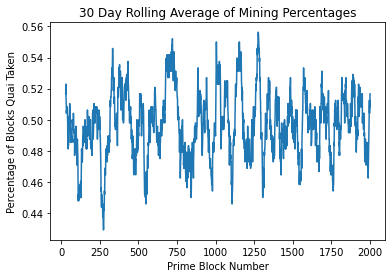

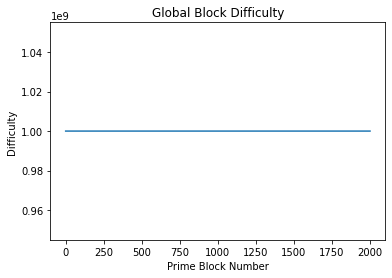

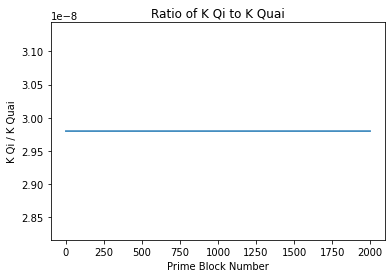

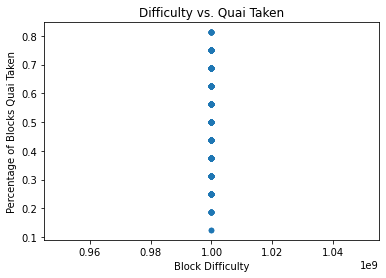

In [3]:
experiment = {"Name": "Sanity Check 0",
               "Param Modifications": {"State Update Skipping Parameter": ["K Qi/Quai", "Difficulty", "Population Beta"],
                                       "Aggregate Hashpower Series": aggregate_hashpower_series},
               "State Modifications": {"Population Mining Beta Vector": np.array([-0.3344, 1e-8]),
                                       "Block Difficulty": 1e9},
               "Blocks": blocks}


state, params, msi, df, metrics = ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[difficulty_metrics, reward_metrics,
                                     controller_metrics, mined_ratio_metrics])

display_results(df, metrics)

## Sanity Check 0 Conclusions

- Given no variance on global difficulty (there is still noise injected for each block but average difficulty is not adjusted), we see a very stable mining ratio around 50%
- We can also see that the beta estimation converges around the true population betas but does not completely converge due to the fact that there is still randomness to the choice of Qi/Quai and also we only record the latest 2000 blocks for fitting the logistic regression

## Scenario A: Sanity Check Scenario

Premise: Ensure the simulation framework is operating as intended, without complications from the controller.

Condition(s): Fix the values of:
- $\mathbf u$, the controller update parameters ($k_{qi}, k_{quai}$); and
- $\pmb{\beta}$, the _miner decision population parameter vector_, i.e. the parameter vector for the miner's probabilistic decision on which token to receive as block reward.



Placeholder has no control action options
Metrics:
Difficulty Mu                        1.242057e+09
Difficulty Sigma                     2.872254e+07
Block Reward Ratio Mu                8.166570e-01
Block Reward Ratio Sigma             2.049967e-02
Conversion Rate Mu                   3.900155e-02
Conversion Rate Sigma                1.031761e-03
K Qi / K Quai Mu                     2.980000e-08
K Qi / K Quai Sigma                  6.619099e-24
Mined Ratio (Block Percent) Mu       4.815937e-01
Mined Ratio (Block Percent) Sigma    1.244951e-01
dtype: float64

Data:
      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0                NaN             NaN           -0.3344      1.000000e-08   
1           0.958481   -2.886523e-08           -0.3344      1.000000e-08   
2           2.307974   -7.035352e-08           -0.3344      1.000000e-08   
3          -0.980555    2.951596e-08           -0.3344      1.000000e-08   
4           0.289294   -8.504000e-09           

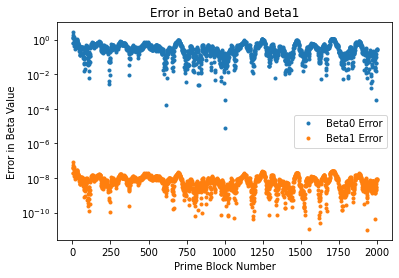

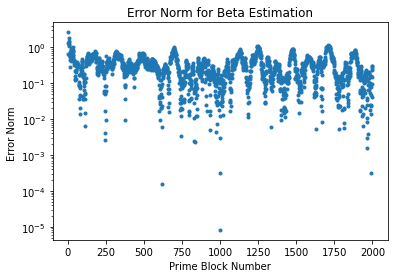

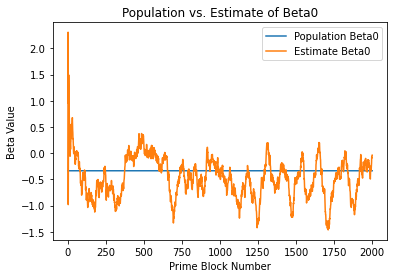

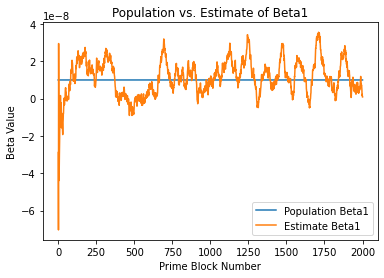

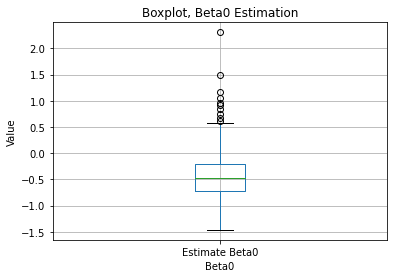

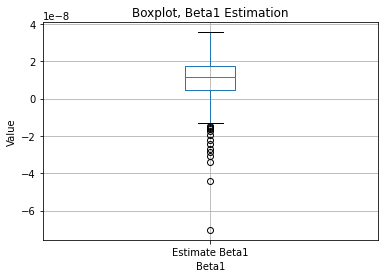

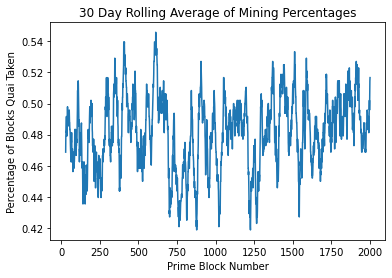

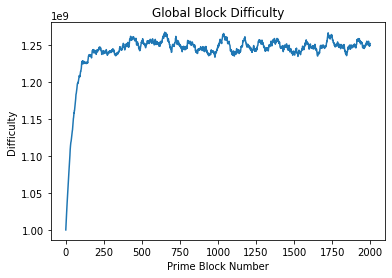

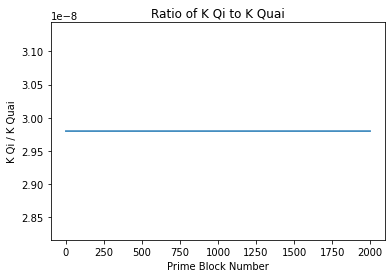

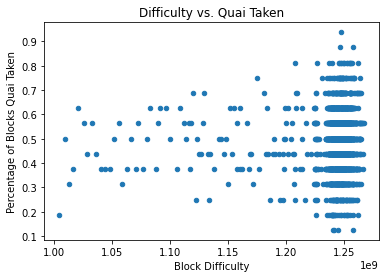

In [4]:
experiment = {"Name": "Scenario A: Variable Difficulty, Value Controller Off",
               "Param Modifications": {"State Update Skipping Parameter": ["K Qi/Quai", "Population Beta"],
                                       "Aggregate Hashpower Series": aggregate_hashpower_series},
               "State Modifications": {"Population Mining Beta Vector": np.array([-0.3344, 1e-8]),
                                       "Block Difficulty": 1e9},
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[difficulty_metrics, reward_metrics,
                                     controller_metrics, mined_ratio_metrics])

display_results(df, metrics)

## Scenario A Conclusions

- Given the fixed aggregate hashpower amount, we see the convergence of the difficulty controller to its new equilibrium
- Once again, the beta estimations become bounded around the true betas

### Scenario B: fixed population parameters, miner model

Premise: To test the controller's ability to learn the miner decision population parameter vector when it is fixed, and to analyze the resulting time series.

**Condition(s)**: Fix the values of:
- $k_{qi}$ (control parameter $u_1$), as this is a _numeraire_ for the system; and
- $\pmb{\beta}$, the _miner decision population parameter vector_.


Placeholder has no control action options
Metrics:
Difficulty Mu                        1.243970e+09
Difficulty Sigma                     2.840224e+07
Block Reward Ratio Mu                1.709310e-02
Block Reward Ratio Sigma             9.479094e-02
Conversion Rate Mu                   8.209542e-04
Conversion Rate Sigma                4.564625e-03
K Qi / K Quai Mu                     6.722410e-06
K Qi / K Quai Sigma                  2.078197e-06
Mined Ratio (Block Percent) Mu       4.815313e-01
Mined Ratio (Block Percent) Sigma    1.235088e-01
Time to Beta Convergance             9.000000e+00
dtype: float64

Data:
      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0                NaN             NaN           -0.3344      1.000000e-08   
1           1.230753   -3.652522e-08           -0.3344      1.000000e-08   
2           0.479599   -1.413444e-08           -0.3344      1.000000e-08   
3           2.725014   -8.320164e-08           -0.3344      1.000000e-08 

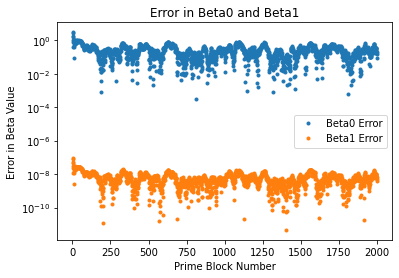

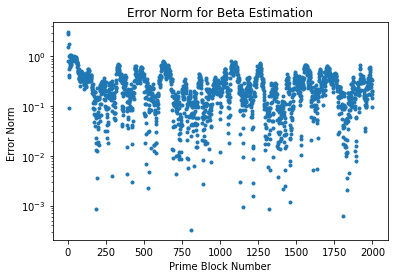

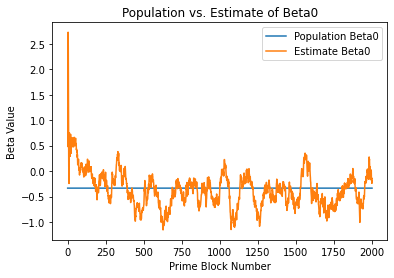

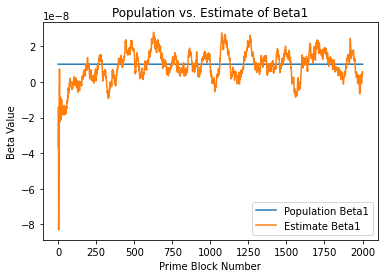

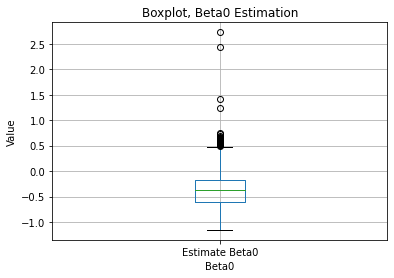

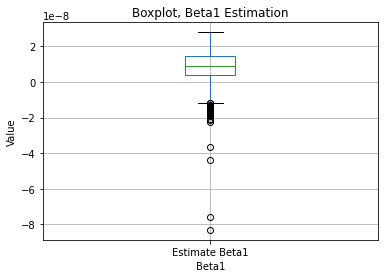

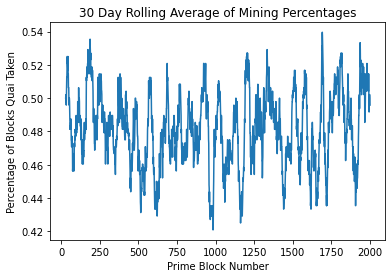

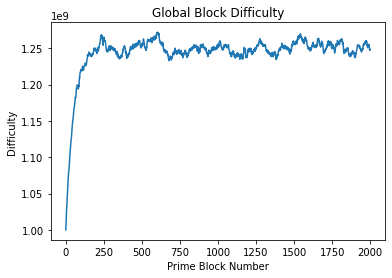

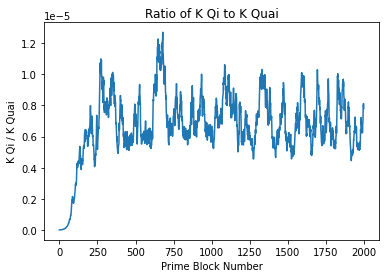

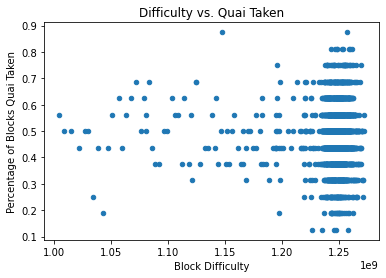

In [5]:
experiment = {"Name": "Scenario B: Variable Difficulty, Value Controller On",
               "Param Modifications": {"State Update Skipping Parameter": ["Population Beta"],
                                       "Aggregate Hashpower Series": aggregate_hashpower_series},
               "State Modifications": {"Population Mining Beta Vector": np.array([-0.3344, 1e-8]),
                                       "Block Difficulty": 1e9},
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[difficulty_metrics, reward_metrics,
                                     controller_metrics, mined_ratio_metrics,
                                     beta_convergance])

display_results(df, metrics)

## Scenario B Conclusions

- With the introduction of updates to K Qi and K Quai, we see how the ratio also approaches an asymptote

### Scenario C: variable population parameters, miner model

Premise: To test the controller's ability to learn the miner decision population parameter vector when it occasionally changes, and to analyze the resulting time series.

**Condition(s)**: 
- Fix the values of:
    - $k_{qi}$ (control parameters $u_1$), as this is a _numeraire_ for the system.
- Draw a realization of $\pmb{\beta}$ from a fixed distribution at two times:
    - Prior to the beginning of each run; and
    - Halfway through each run.


Placeholder has no control action options
Metrics:
Difficulty Mu                        1245882491.287771
Difficulty Sigma                       28794424.835093
Block Reward Ratio Mu                         0.018451
Block Reward Ratio Sigma                      0.099221
Conversion Rate Mu                            0.000886
Conversion Rate Sigma                         0.004776
K Qi / K Quai Mu                               0.00023
K Qi / K Quai Sigma                           0.000573
Mined Ratio (Block Percent) Mu                0.443188
Mined Ratio (Block Percent) Sigma             0.131204
Time to Beta Re-stabilization                     27.0
Beta re-stabilized?                               True
dtype: object

Data:
      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0                NaN             NaN           -0.3344      1.000000e-08   
1          -2.425486    7.303965e-08           -0.3344      1.000000e-08   
2          -3.808056    1.118220e-07    

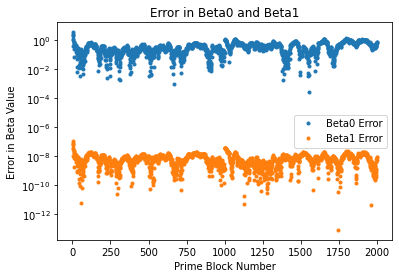

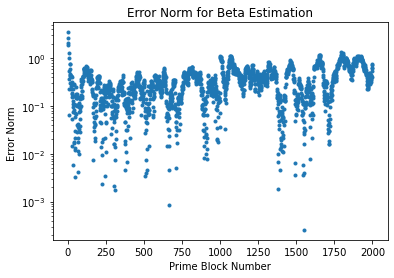

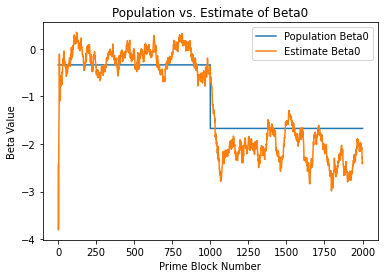

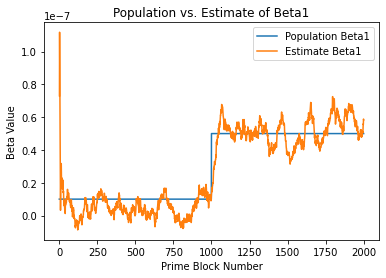

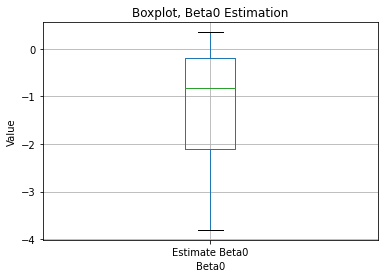

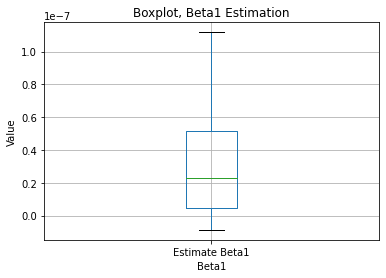

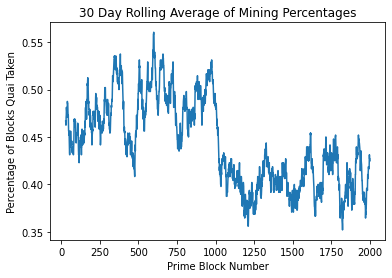

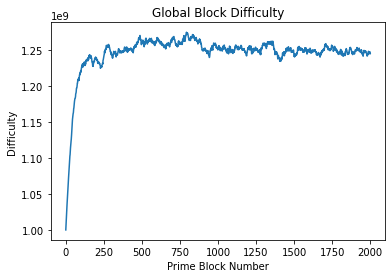

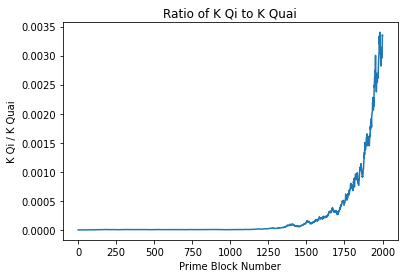

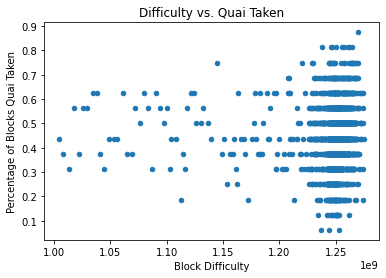

In [6]:
experiment = {"Name": "Scenario C: Variable Difficulty, Variable Population Betas, Value Controller On",
               "Param Modifications": {"State Update Skipping Parameter": [],
                                       "Population Beta Signal": [np.array([-0.3344, 1e-8])] * (T//2) +
                                       [np.array([-1.672, 5e-8])] * (T//2+1),
                                       "Aggregate Hashpower Series": aggregate_hashpower_series},
               "State Modifications": {"Population Mining Beta Vector": np.array([-0.3344, 1e-8]),
                                       "Block Difficulty": 1e9},
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[difficulty_metrics, reward_metrics,
                                     controller_metrics, mined_ratio_metrics,
                                     beta_convergance2])

display_results(df, metrics)

## Scenario C Conclusions

- Given the change in population beta we can observe two things:
    - The beta estimation is reactive and picks up the change rather quickly
    - The updates to the ratio of reward constants also is reactive to the change and we can see where there is a change in the slope to account for this new population beta

## Scenario D

Scenario D introduces one nuance, the behavioral model also now has a vector feature for the block reward ratio. The estimated model does not update for it, but this scenario is meant to show it is still robust even with underlying changes to the behavioral assumptions.

Placeholder has no control action options
Metrics:
Difficulty Mu                        1241846601.764449
Difficulty Sigma                       28684018.320468
Block Reward Ratio Mu                         0.016719
Block Reward Ratio Sigma                      0.095431
Conversion Rate Mu                            0.000803
Conversion Rate Sigma                         0.004595
K Qi / K Quai Mu                              0.000246
K Qi / K Quai Sigma                           0.000656
Mined Ratio (Block Percent) Mu                0.443219
Mined Ratio (Block Percent) Sigma             0.129048
Time to Beta Re-stabilization                     26.0
Beta re-stabilized?                               True
dtype: object

Data:
      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0                NaN             NaN           -0.3344      1.000000e-08   
1          -0.529420    1.608682e-08           -0.3344      1.000000e-08   
2          -0.089367    2.698043e-09    

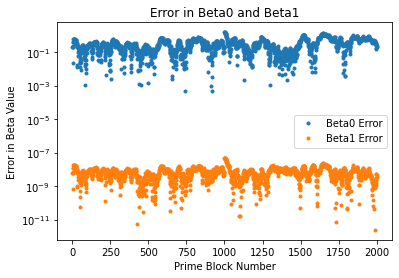

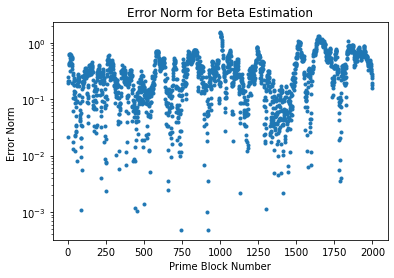

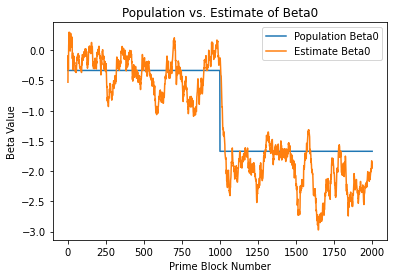

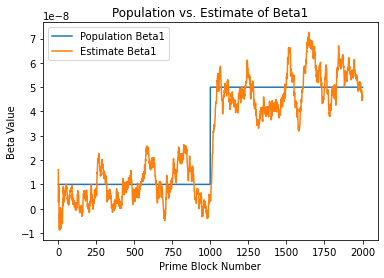

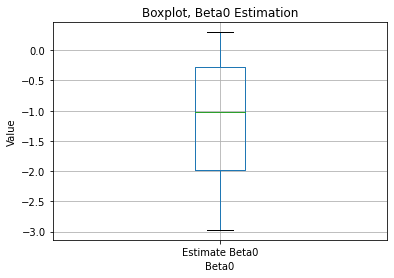

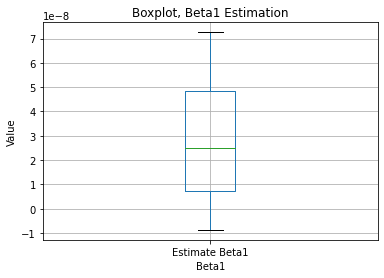

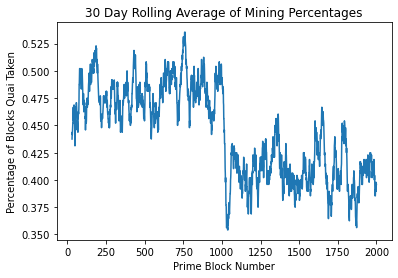

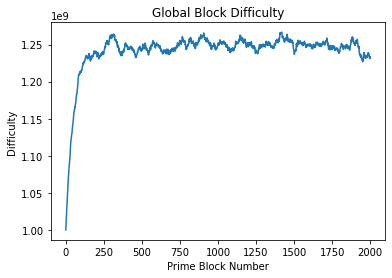

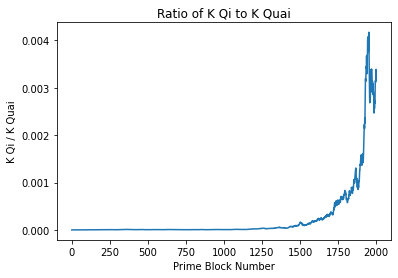

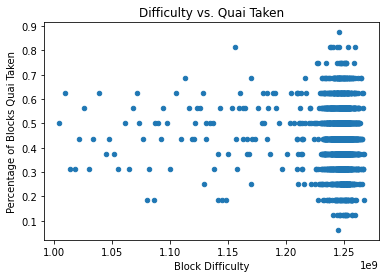

In [7]:
experiment = {"Name": "Test",
               "Param Modifications": {"State Update Skipping Parameter": [],
                                       "Population Beta Signal": [np.array([-0.3344, 1e-8, 1e-8])] * (T//2) +
                                       [np.array([-1.672, 5e-8, 1e-8])] * (T//2+1),
                                       "Aggregate Hashpower Series": aggregate_hashpower_series,
                                       "FP Mining Payment Policy": "Logistic Probability Payment Policy V2",},
               "State Modifications": {"Population Mining Beta Vector": np.array([-0.3344, 1e-8, 1e-8])},
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[difficulty_metrics, reward_metrics,
                                     controller_metrics, mined_ratio_metrics,
                                     beta_convergance2])

display_results(df, metrics)

## Scenario D Conclusions

- We see the controller is robust to changing behavioral assumptions

## Scenario E

This scenario is similar to scenario D except the new feature is the log of the reward ratio.

Placeholder has no control action options
Metrics:
Difficulty Mu                        1241170187.525759
Difficulty Sigma                       28302738.419105
Block Reward Ratio Mu                         0.017795
Block Reward Ratio Sigma                      0.092314
Conversion Rate Mu                            0.000855
Conversion Rate Sigma                         0.004444
K Qi / K Quai Mu                              0.000194
K Qi / K Quai Sigma                           0.000486
Mined Ratio (Block Percent) Mu                0.442906
Mined Ratio (Block Percent) Sigma             0.129485
Time to Beta Re-stabilization                     76.0
Beta re-stabilized?                               True
dtype: object

Data:
      Estimate Beta0  Estimate Beta1  Population Beta0  Population Beta1  \
0                NaN             NaN           -0.3344      1.000000e-08   
1           0.017347   -5.411943e-10           -0.3344      1.000000e-08   
2           0.223513   -6.837584e-09    

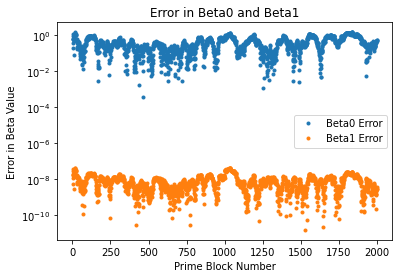

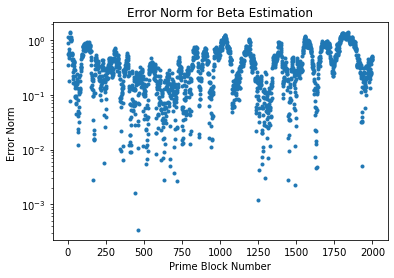

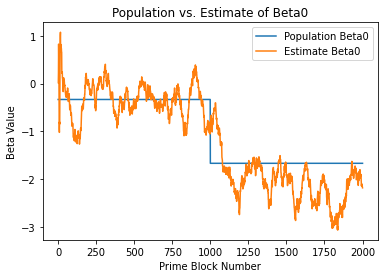

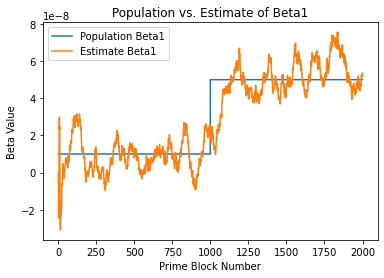

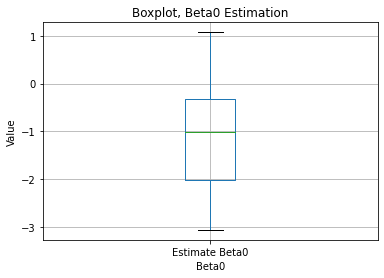

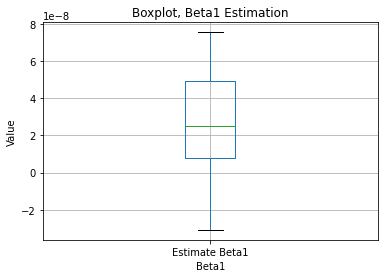

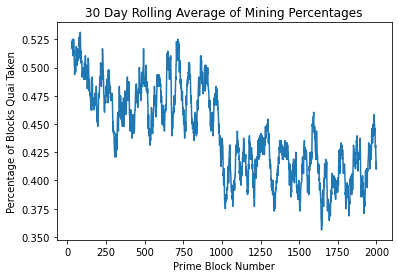

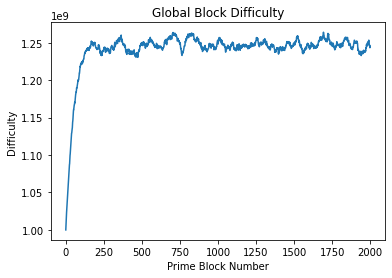

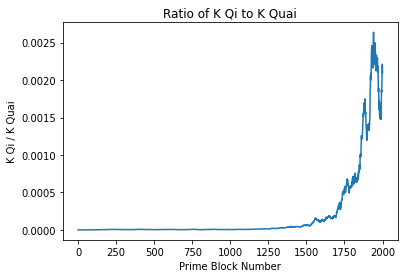

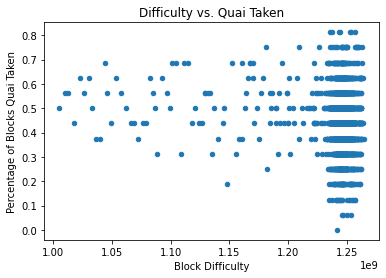

In [8]:
experiment = {"Name": "Test",
               "Param Modifications": {"State Update Skipping Parameter": [],
                                       "Population Beta Signal": [np.array([-0.3344, 1e-8, 1e-8])] * (T//2) +
                                       [np.array([-1.672, 5e-8, 1e-8])] * (T//2+1),
                                       "Aggregate Hashpower Series": aggregate_hashpower_series,
                                       "FP Mining Payment Policy": "Logistic Probability Payment Policy V3",},
               "State Modifications": {"Population Mining Beta Vector": np.array([-0.3344, 1e-8, 1e-8])},
               "Blocks": blocks}


state, params, msi, df, metrics= ms.run_experiment(experiment,
                  params_base,
                  state_base,
                  post_processing_function,
                  state_preperation_functions=[vesting_schedule_translate, build_logistic_classifier],
                  parameter_preperation_functions=[],
                  metrics_functions=[difficulty_metrics, reward_metrics,
                                     controller_metrics, mined_ratio_metrics,
                                     beta_convergance2])

display_results(df, metrics)

## Scenario E Conclusions

- Our controller is robust to changing behavioral models